In [ ]:
import numpy as np
import pandas as pd

import os
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog"))

['RESNET_50_FLOWER_CLASSIFICATION.ipynb', 'Untitled0.ipynb', 'data', 'cnn_model.h5', 'new_label', 'cnn_flower_recognition.ipynb', 'Untitled1.ipynb']


In [ ]:
!pip3 install resnet

In [ ]:
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras.applications.resnet import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array


In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )

image_size = 224
batch_size = 10
train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_generator.class_indices)

Found 480 images belonging to 6 classes.


In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights="imagenet"))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
count = sum([len(files) for r, d, files in os.walk("../input/flowers-recognition/flowers/flowers/")])

model.fit_generator(
        train_generator,
        steps_per_epoch=int(count/batch_size) + 1,
        epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 1.3704 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 1.5126 - accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 1.8056 - accuracy: 0.7000
Epoch 4/100
1/1 [==============================] - 5s 5s/step - loss: 1.4036 - accuracy: 0.8000
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 2.9648 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 2.1170 - accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.0291 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 2.2612 - accuracy: 0.7000
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 0.5863 - accuracy: 0.9000
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 2.9839 - accuracy: 0.6000
Epoch 11/100
1/1 [=====================

In [ ]:
from IPython.display import Image, display

import os, random
img_locations = []
for d in os.listdir("/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/"):
    directory = "/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/" + d
    sample = [directory + '/' + s for s in random.sample(
        os.listdir(directory), int(random.random()*10))]
    img_locations += sample

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


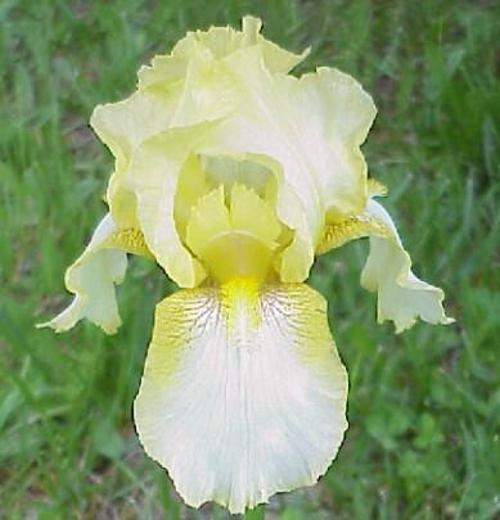

orris_root


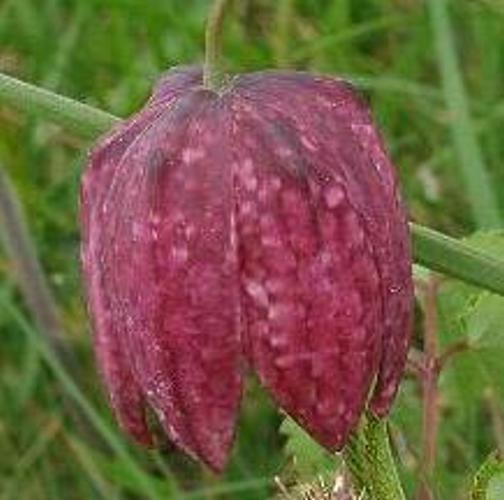

toad_lilly


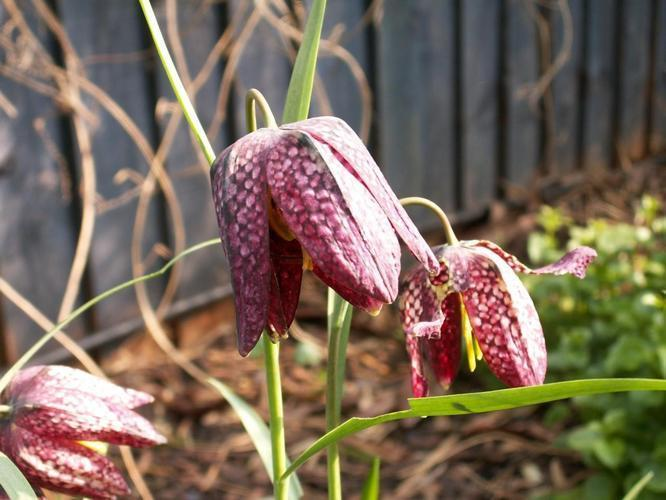

toad_lilly


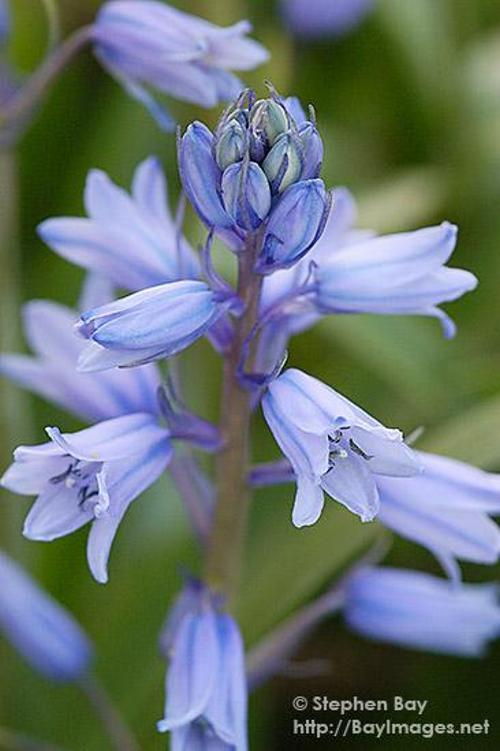

flowering_dogwood


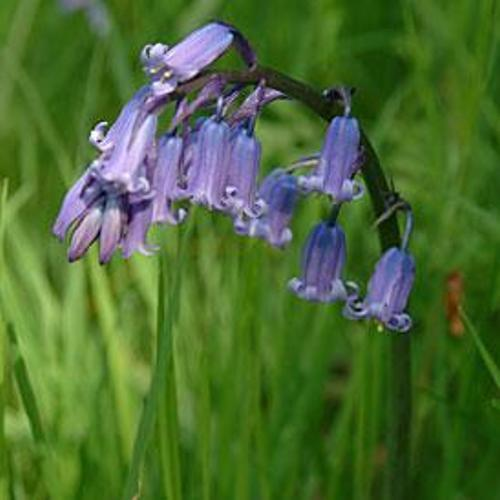

scilia


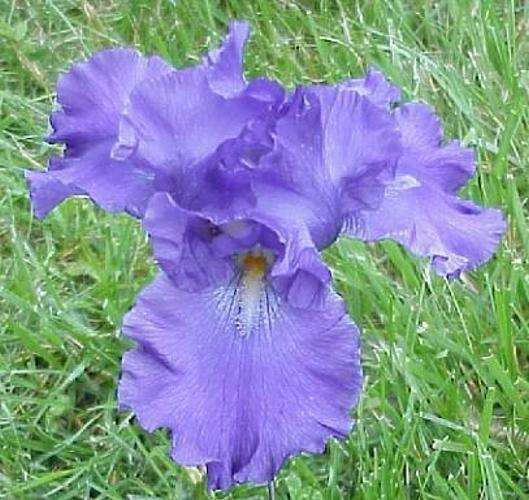

orris_root


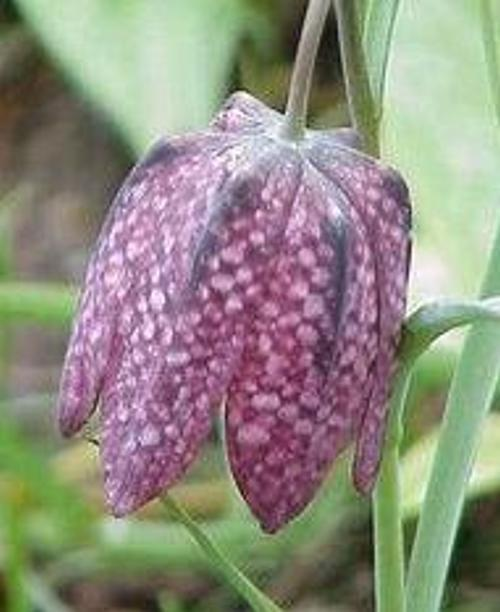

toad_lilly


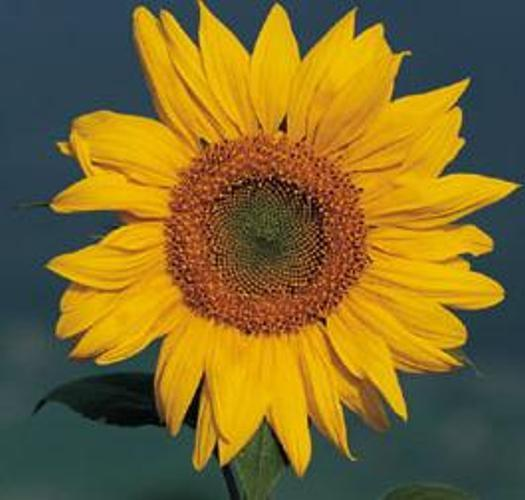

Sunflower


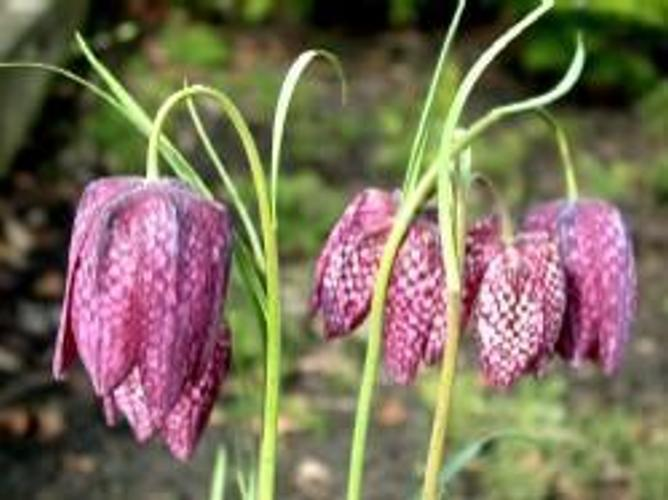

toad_lilly


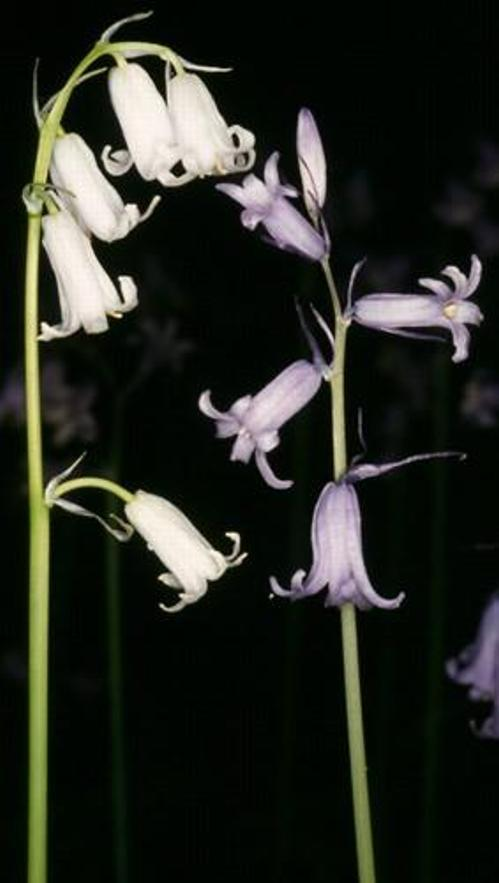

scilia


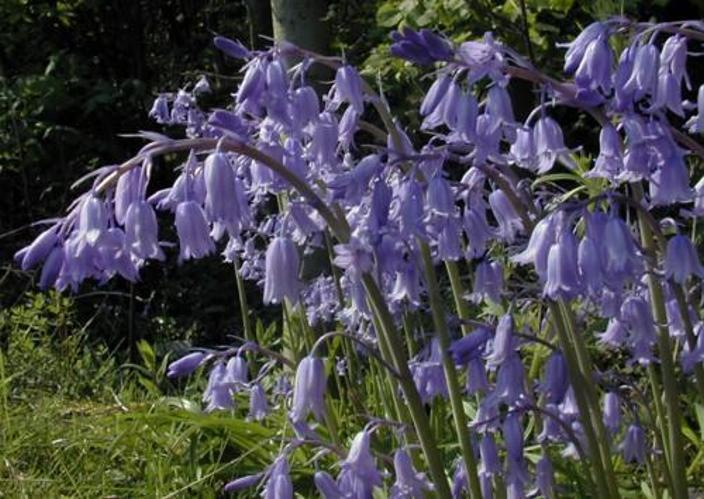

scilia


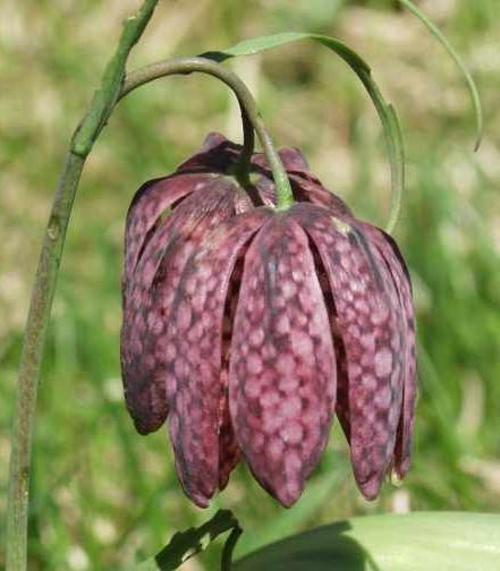

toad_lilly


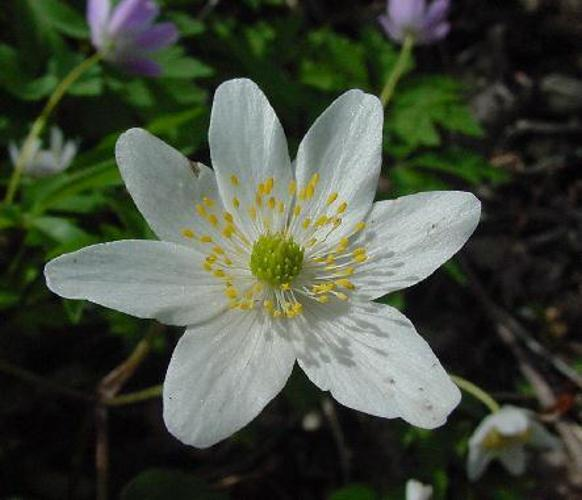

flowering_dogwood


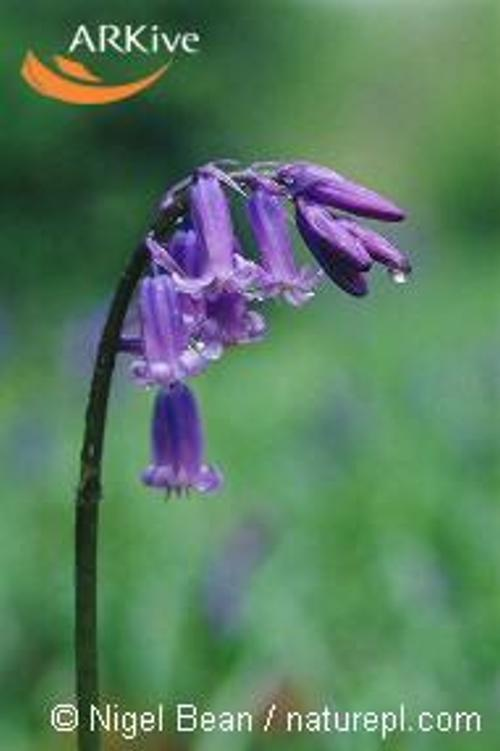

toad_lilly


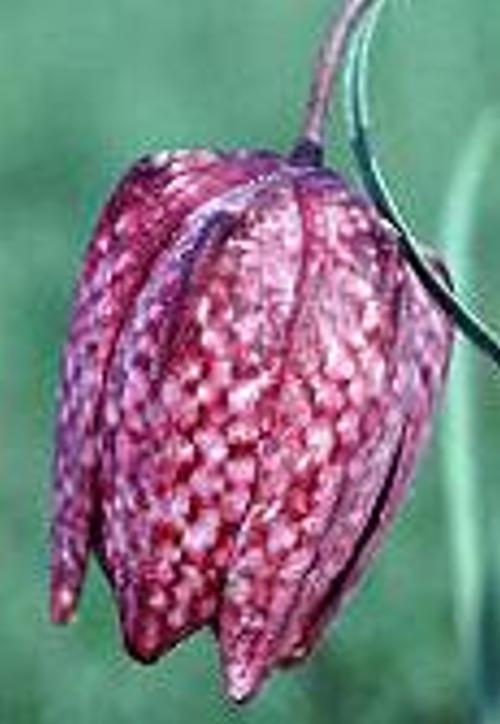

toad_lilly


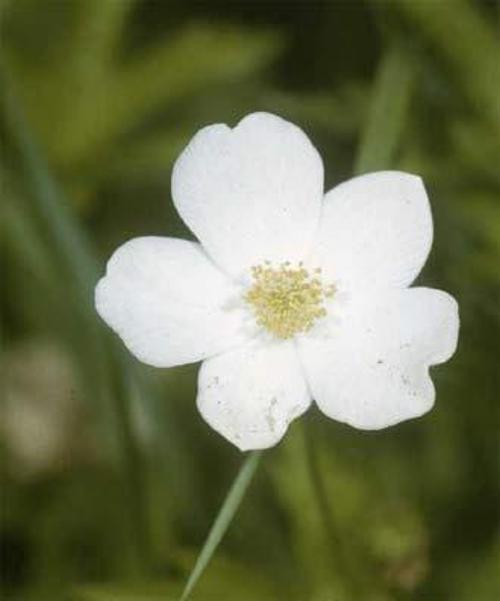

flowering_dogwood


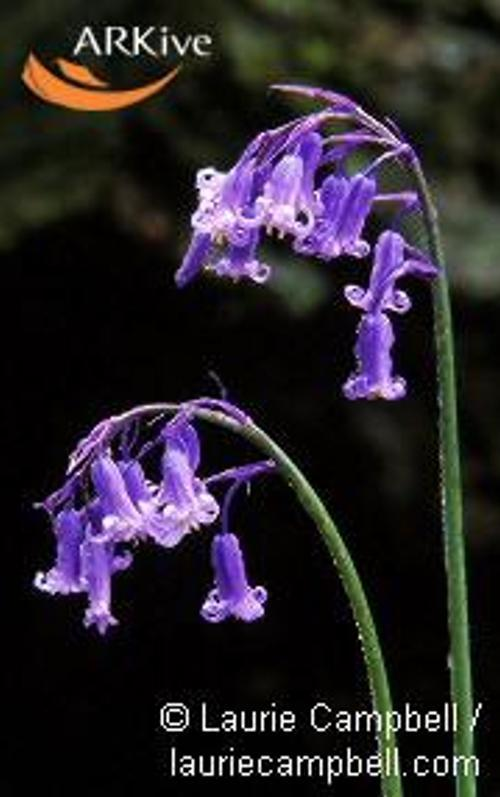

scilia


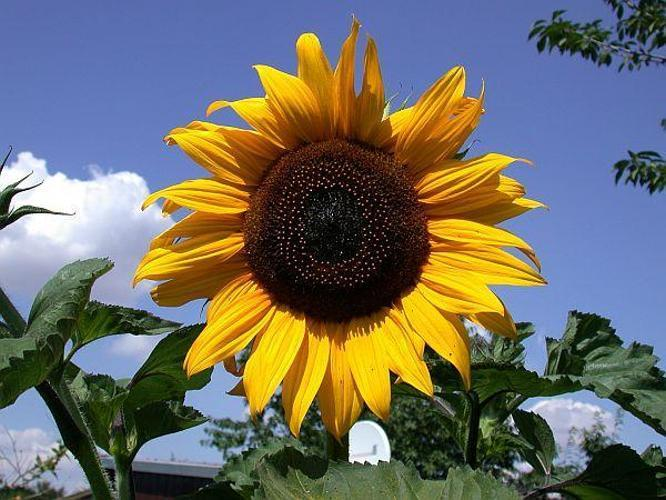

Sunflower


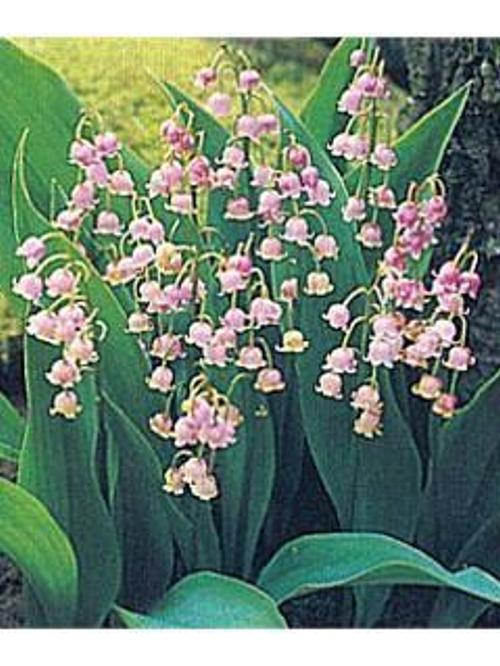

scilia


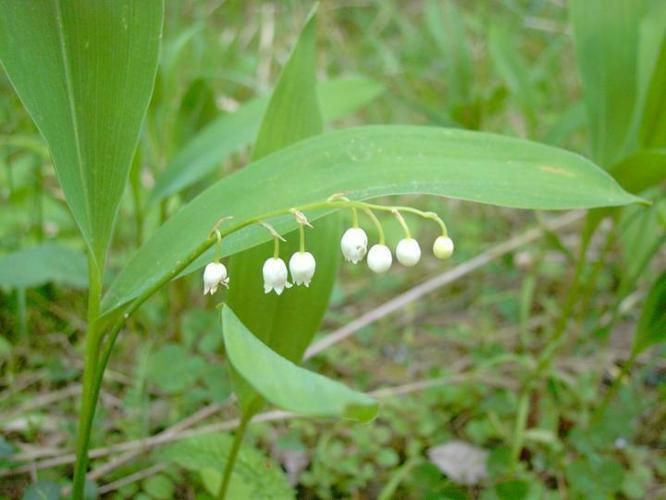

lilly_of_the_valley


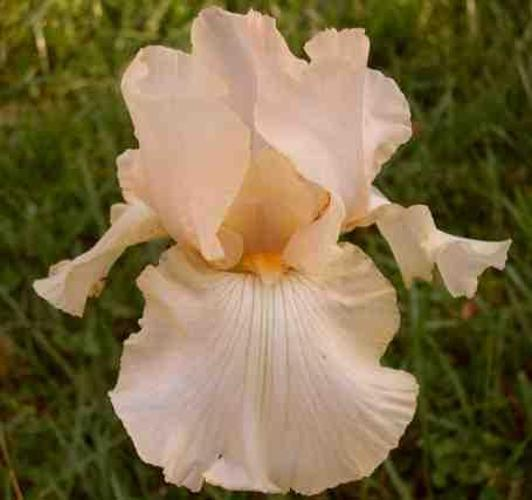

orris_root


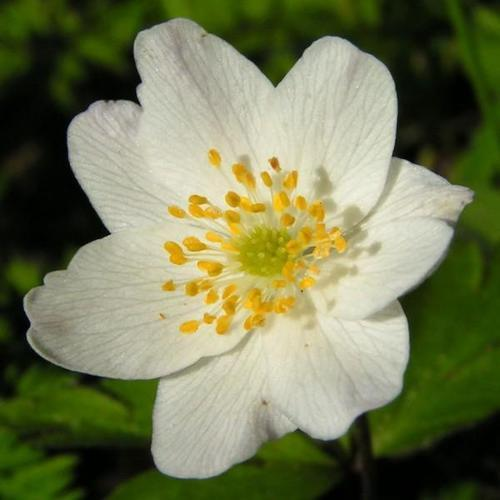

flowering_dogwood


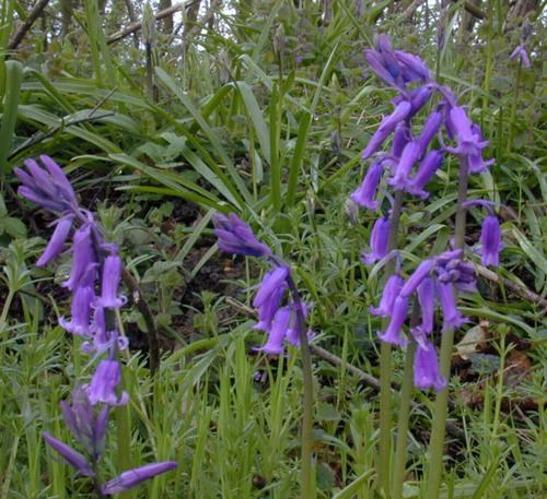

toad_lilly


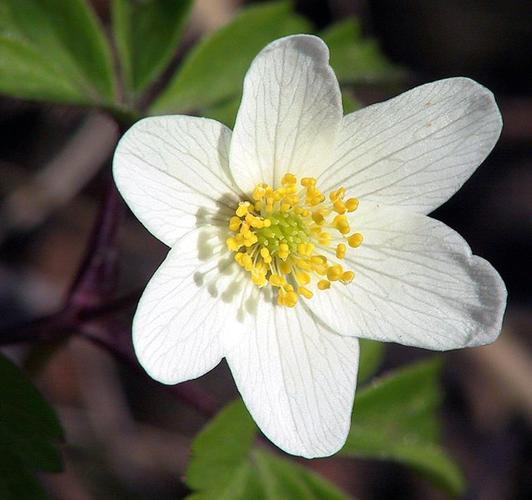

flowering_dogwood


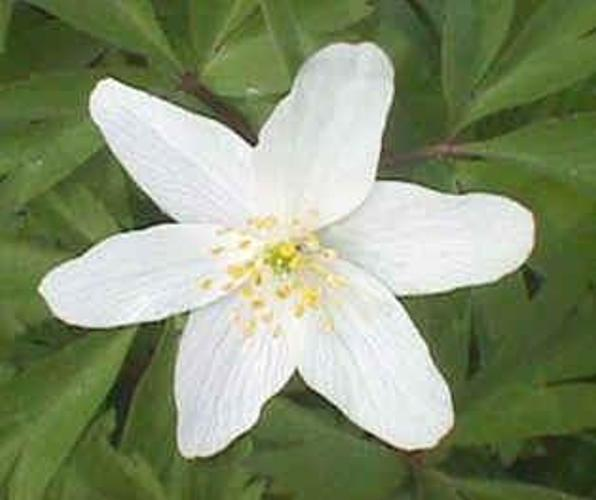

flowering_dogwood


In [ ]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

random.shuffle(img_locations)
imgs = read_and_prep_images(img_locations)
predictions = model.predict_classes(imgs)
classes = dict((v,k) for k,v in train_generator.class_indices.items())

for img, prediction in zip(img_locations, predictions):
    display(Image(img))
    print(classes[prediction])
